In [1]:
# Imports and matplotlib configuration
import numpy as np
import scipy.signal

%matplotlib inline
import matplotlib.pylab as plt
import ipywidgets as widgets
from IPython.display import display

# Bayesian modeling

## Introduction

**Recap:** The Bayesian premise

- Inference is made by producing probability density functions (pdf): **posterior**
- Model the uncertainty of the data, experiment, parameters, etc. as a **joint pdf**
- $\theta$ is a R.V., *i.e.* it follows a distribution: **prior**

The Bayes theorem and the law of total probability tell us

$$
p(\theta| \{x\}) = \frac{p(\{x\}, \theta)}{p(\{x\})}= \frac{p(\{x\}|\theta) p(\theta)}{\int p(\{x\}|\theta) p(\theta) d\theta} \propto p(\{x\}|\theta) p(\theta),
$$


- In Bayesian model fitting we seek the **posterior** (parameters given the data) 
- The posterior is build from the **likelihood**, **prior** and **evidence** (marginal data likelihood)
- The posterior can be small if either the likelihood or the prior are small




### Why/When should I use the Bayesian formalism?

- In many cases the Bayesian inference will not differ much from MLE
- In general the Bayesian inference is harder to compute and requires more sophisticated methods

Then? 

- We can integrate unknown/missing/uninteresting (nuisance) parameters
- Principled way of injecting prior knowledge (regularization)
- Built-in uncertainty measure on parameters and predictions


### The Bayesian inference procedure

1. Formulate data likelihood
1. Choose a prior
1. Build a joint distribution (relation of all parameters)
1. Determine the posterior using Bayes Theorem
1. Find MAP and credible regions
1. Do hypothesis test
1. **Criticize:** Evaluate how appropriate the model is and suggest improvements



## Maximum *a posteriori* (MAP) estimation

In the Bayesian setting the best "point estimate" of the parameters of the model is given by the MAP 

$$
\hat \theta = \text{arg} \max_\theta p(\theta|\{x\}) =  \text{arg} \max_\theta p(\{x\}| \theta) p(\theta),
$$

where we "omit" the evidence because it does not depend on $\theta$

Applying the logarithm (monotonic) we can decouple the likelihood from the prior

$$
\hat \theta = \text{arg} \max_\theta \log p(\{x\}| \theta) + \log p(\theta),
$$


- MAP estimation is also referred as penalized MLE 
- MAP is still a point estimate: poor's man Bayes

### Priors

Priors summarize what we know about the parameters before-hand, for example
- a parameter is bounded/unbounded (Normal/Cauchy)
- a parameter is positive (Half-normal, Half-Cauchy, Lognormal, Inverse Gamma)
- a parameter is positive-semidefinite (Inverse Wishart, LKJ)
- a parameter follows a simplex (Dirichlet)

Priors can be 
- Informative, *e.g.* my parameter is $\mathcal{N}(\theta|\mu=5.4, \sigma^2=0.1)$
- Weakly informative, *e.g.* my parameter is $\mathcal{N}(\theta|\mu=0, \sigma^2=100.)$
- Uninformative (objective), *e.g.* my parameter is positive

Priors should 
- add positive probabilistic weights on possible values
- no weight to impossible values
- help regularize the solution

Other guidelines to select priors:
- **Conjugate priors:** Given a likelihood the posterior has the same distribution as the prior (more on this later)
- Maximum entropy principle [Murphy 4.1.4]


**More on priors**

- Murphy 5.4
- [Stan prior choice recommendations](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations)




### Example: MAP of the mean of a Gaussian dist.

We want to find the MAP for the weight of your professor. 

Assuming that the likelihood is Gaussian with known variance we have

$$
\log p(\{x\}|\theta) = \log L (\mu)  = - \frac{N}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^{2}}   \sum_{i=1}^N (x_i-\mu)^2, 
$$

and further assuming that the true weight has a Gaussian prior $p(\theta)=\mathcal{N}(\mu|\mu_0, \sigma^2_0)$

$$
\log p(\theta) = -\frac{1}{2} \log 2 \pi \sigma^2_0 - \frac{1}{2 \sigma^2_0}  (\mu - \mu_0)^2,
$$

then we set the derivative to zero

$$
\frac{d}{d\mu} \log p(\{x\}|\theta) + \log p(\theta) =   \frac{1}{\sigma^{2}}   \sum_{i=1}^N (x_i-\mu)  - \frac{1}{ \sigma^2_0}  (\mu - \mu_0) = 0,
$$

and we get the MAP estimate

$$
\hat \mu_{\text{map}} =  \left(\frac{N}{\sigma^2} + \frac{1}{\sigma^2_0} \right)^{-1} \left(\frac{N}{\sigma^2} \bar x + \frac{1}{\sigma^2_0} \mu_0 \right),
$$

where $\bar x = \frac{1}{N} \sum_{i=1}^N x_i$.

**IMPORTANT:** Do not confuse $\sigma^2$ (the noise variance) and $\sigma^2_0$ (prior variance)


### Particular cases 

The MAP estimator for a  standard normal prior $\mathcal{N}(\mu| 0, 1)$ is

$$
\hat \mu_{\text{map}} =  \left(\frac{N}{\sigma^2} + 1 \right)^{-1} \left(\frac{N\bar x}{\sigma^2} \right) = \frac{1}{1 + \sigma^2/N} \bar x,
$$

note that  

$$
\lim_{N \to \infty} \hat \mu_{\text{map}} = \bar x,
$$

which is the MLE solution


Similarly, the MAP estimator for a normal prior $\mathcal{N}(\mu| 0, \sigma^2_0)$ with $\sigma^2_0 \to \infty$

$$
\hat \mu_{\text{map}} =  \left(\frac{N}{\sigma^2} \right)^{-1} \left(\frac{N\bar x}{\sigma^2} \right) =  \bar x,
$$

which is again the MLE solution

> Can you explain the intuition behind this particular solutions?



### General case

Note that

$$
\begin{align}
\hat \mu_{\text{map}}  &=  \left(\frac{N}{\sigma^2} + \frac{1}{\sigma^2_0} \right)^{-1} \left(\frac{N\bar x}{\sigma^2}  + \frac{\mu_0}{\sigma^2_0} \right)  \nonumber \\
&=  \frac{N \bar x \sigma^2_0 + \mu_0 \sigma^2}{N\sigma^2_0+ \sigma^2} = \frac{\bar x + \mu_0 \frac{\sigma^2}{\sigma^2_0 N}}{1 + \frac{\sigma^2}{\sigma^2_0 N}}  \nonumber \\
&= w \bar x + (1-w) \mu_0, \qquad w = \frac{1}{1 + \frac{\sigma^2}{\sigma^2_0 N}}  \nonumber
\end{align}
$$

> The MAP estimate of the mean is a weighted average between $\mu_0$ and $\bar x$ (MLE solution)

If either $\sigma^2_0$ or $N$ are large wrt $\sigma^2$, then $w=1$ and the MLE is recovered


**Reflect on the following:** The prior has more influence when

- You have few samples
- Your samples are noisy



### Extra: MAP intepretation as a penalized MLE/regularized LS

The MAP estimate of the mean of a Gaussian dist with known variance using a zero-mean normal prior is

$$
\begin{align}
\hat \mu_{\text{map}}  &= \text{arg} \max_\mu  \log p(\{x\}| \mu, \sigma^2) + \log p(\mu) \nonumber \\
&= \text{arg} \max_\mu   - \frac{N}{2} \log 2\pi\sigma^2 - \frac{1}{2\sigma^{2}}   \sum_{i=1}^N (x_i-\mu)^2 -  \frac{1}{2\sigma_0^2} \mu^2 \nonumber \\
&= \text{arg} \min_\mu \frac{1}{2\sigma^{2}}   \sum_{i=1}^N (x_i-\mu)^2 +  \frac{1}{2\sigma_0^2} \mu^2 \nonumber \\
&= \text{arg} \min_\mu \|x-\mu\|^2  + \lambda \|\mu \|^2, \nonumber
\end{align}
$$

where $\lambda = \frac{\sigma^2}{\sigma_0^2}$. 

We recognize the last equation as a regularized least squares problem

- A Gaussian prior yields a L2 regularizer (ridge regression)
- A Laplacian prior yields a L1 regularizer (LASSO)

> For more in these see "3.4 Shrinkage methods", page 61, Hastie, Tibshirani, Friedman

We will review ridge regression in this course (future class)

## Analytical posterior with conjugate prior 

The MAP is only a point estimate

For the mean of a Gaussian distribution we can get the full posterior analytically

$$
\begin{align}
p(\theta |\{x\}) &\propto p(\{x\} |\theta ) p(\theta ) \nonumber \\
&\propto \exp \left ( \frac{1}{2\sigma^2} \sum_i (x_i - \mu)^2 \right) \exp \left ( \frac{1}{2\sigma_0^2} (\mu - \mu_0)^2 \right) \nonumber \\
&\propto \exp \left ( -\frac{1}{2 \hat \sigma^2} (\mu - \hat \mu_{\text{map}} )^2 \right),  \nonumber 
\end{align}
$$

where 

$$
\hat \sigma^2 = \left(\frac{N}{\sigma^2} + \frac{1}{\sigma^2_0} \right)^{-1} 
$$

> The Gaussian is conjugate to itself

Other way to show this is to use the [property of Gaussian pdf multiplication](http://www.tina-vision.net/docs/memos/2003-003.pdf)

$$
\mathcal{N}(x|\mu_1, \sigma_1^2) \mathcal{N}(x|\mu_2, \sigma_2^2) = C \mathcal{N}\left(x\bigg\rvert \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}\left( \frac{\mu_1}{\sigma_1^2} + \frac{\mu_2}{\sigma_2^2}\right), \frac{\sigma_1^2 \sigma_2^2}{\sigma_1^2 + \sigma_2^2}\right)
$$

where $C$ is a scaling constant


### Interactive example

Gaussian distributed data with $\mu=0$ and $\sigma=1$ is generated

The asymptotic distribution of the MLE (blue) is compared with the posterior (green) 

The posterior is computed using a Gaussian prior (orange)

- What happens with $N$ grows?
- What happens when $\sigma_0$ grows?

We will use `scipy.stats`

In [2]:
from scipy.stats import norm as Gaussiana

    Signature:       Gaussiana(*args, **kwds)
    Type:            norm_gen
    String form:     <scipy.stats._continuous_distns.norm_gen object at 0x7f9bc2b94340>
    File:            ~/.conda/envs/info183/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py
    Docstring:      
    A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

interactive(children=(FloatSlider(value=0.0, description='$\\mu_0$', max=3.0, min=-3.0), FloatSlider(value=1.0…

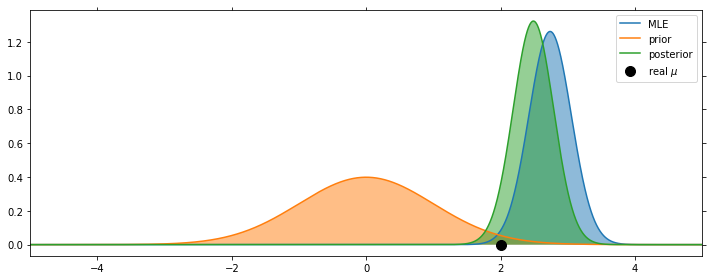

In [3]:
plt.close('all'); fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
x = np.linspace(-10, 10, num=10000)
mu, s2 = 2., 1.

def update(mu0, s20, N):
    # data
    xi = Gaussiana(loc=mu, scale=s2).rvs(N, random_state=0)
    ax.cla(); ax.set_xlim([-5, 5]);
    ax.scatter(mu, 0, c='k', s=100, zorder=100, label=r'real $\mu$')
    # likelihood
    likelihood = Gaussiana(loc=np.mean(xi), scale=np.sqrt(s2/N))
    ax.plot(x, likelihood.pdf(x), label='MLE'); 
    ax.fill_between(x, 0, likelihood.pdf(x), alpha=0.5)
    # prior
    prior = Gaussiana(loc=mu0, scale=np.sqrt(s20))
    ax.plot(x, prior.pdf(x), label='prior'); 
    ax.fill_between(x, 0, prior.pdf(x), alpha=0.5)
    # posterior
    s2_pos = (N/s2 + 1./s20)**-1
    mu_pos = (np.sum(xi)/s2 + mu0/s20)*s2_pos;
    posterior = Gaussiana(loc=mu_pos, scale=np.sqrt(s2_pos))
    ax.plot(x, posterior.pdf(x), label='posterior'); 
    ax.fill_between(x, 0, posterior.pdf(x), alpha=0.5)    
    plt.legend()    
    display(f'Credible interval for mu: [{posterior.ppf(0.025):0.4f}, {posterior.ppf(0.975):0.4f}]')

widgets.interact(update, 
         mu0=widgets.FloatSlider(description=r"$\mu_0$", min=-3, max=3, value=0.), 
         s20=widgets.FloatSlider(description=r"$\sigma_0^2$", min=0.1, max=10., value=1.),
         N=widgets.SelectionSlider(options=[1, 2, 5, 10, 20, 50, 100], value=10));

### What are the Credible Interval (CI) and the High Posterior Density (HPD) regions?

One way to summarize the posterior is to measure its **width**

The $100(1-\alpha)$ % CI of $\theta$ is a contiguous region $[\theta_{l}, \theta_{u}]$ such that

$$
P(\theta_{l}< \theta < \theta_{u}) = 1 - \alpha
$$

We have to either know the functional form of the posterior (Analytical) or have a posterior from which we can sample (MCMC)

The HPD is an alternative to CI that is better when we have multiple modes

The HPD depends on the height of the posterior

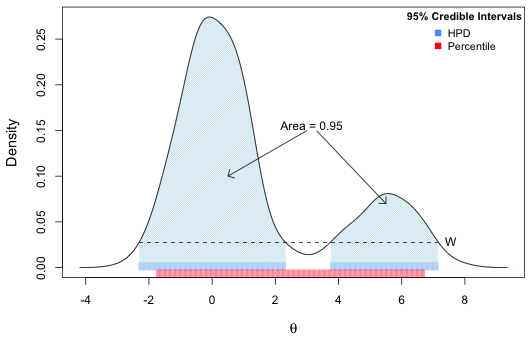

> See Murphy 5.2 for more details

### Conjugate prior when $\sigma^2$ is unknown

Assuming that the mean $\mu$ is known the conjugate prior for the variance is an inverse-Gamma distribution

$$
p(\sigma^2) = \text{IG}(\sigma^2| \alpha_0, \beta_0) = \frac{\beta_0^{\alpha_0}}{\Gamma(\alpha_0)} x^{-\alpha_0-1} e^{-\frac{\beta_0}{x}}
$$

And the resulting posterior is also 

$$
\text{IG}\left(\sigma^2| \alpha_N , \beta_N  \right)
$$

with

- $ \alpha_N = \alpha_0 + N/2$
- $\beta_N = \beta_0 + \frac{1}{2} \sum_{i=1}^N (x_i - \mu)^2$


interactive(children=(FloatSlider(value=0.01, description='a', max=10.0, min=0.01), FloatSlider(value=0.01, de…

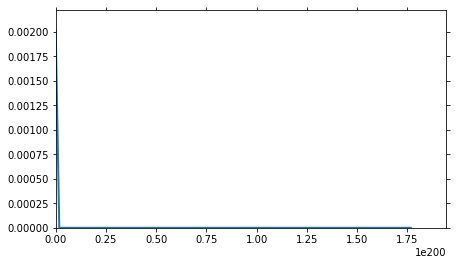

In [4]:
from scipy.stats import invgamma

fig, ax = plt.subplots(figsize=(7, 4))

def update(a,b):
    ax.cla()
    x = np.linspace(invgamma.ppf(0.01, a, b), 
                    invgamma.ppf(0.99, a, b), 100)
    px = invgamma.pdf(x, a, b)
    ax.plot(x, px, linewidth=2)
    ax.set_xlim([np.amin(x)*0.9, np.amax(x)*1.1])
    ax.set_ylim([np.amin(px)*0.9, np.amax(px)*1.1])  
    
widgets.interact(update, a=widgets.FloatSlider(min=0.01, max=10.0), 
         b=widgets.FloatSlider(min=0.01, max=10.0));

As both $\alpha$ and $\beta$ encode the strength of the prior the following parameterization is broadly used

$$
p(\sigma^2) = \text{IG}(\sigma^2| \alpha, \beta) = \text{IG}\left(\sigma^2| \frac{\nu}{2}, \frac{\nu \sigma_0^2}{2}\right)
$$

where $\sigma_0^2$ controls the value of the prior and $\nu$ the strength

This is also closely related to the [inverse chi-square distribution](https://en.wikipedia.org/wiki/Inverse-chi-squared_distribution)

### Conjugate priors when $\mu$ and $\sigma^2$ are unknown

- Multiplying the normal prior and the IG prior does not yield a conjugate prior (assumes independence of $\mu$ and $\sigma$)
- In this case the conjugate prior is hierarchical

$$
\begin{align}
p(x_i|\mu, \sigma^2) &= \mathcal{N}(\mu, \sigma^2)  \nonumber \\
p(\mu|\sigma^2) &= \mathcal{N}(\mu_0, \sigma^2/\lambda_0)  \nonumber \\
p(\sigma^2) &= \text{IG}(\alpha, \beta)  \nonumber
\end{align}
$$

which is called **normal-inverse-gamma (NIG)**, a four parameter distribution 

The NIG prior is

$$
p(\mu, \sigma^2) = \text{NIG}(\mu_0, \lambda_0, \alpha_0, \beta_0) = \mathcal{N}(\mu|\mu_0 , \sigma^2/\lambda_0) \text{IG}(\sigma^2|\alpha_0, \beta_0)
$$

An the posterior is also NIG

$$
p(\mu, \sigma^2|\{x\}) =  \text{NIG}(\mu_n, \lambda_n, \alpha_n, \beta_n)
$$  

where

- $\lambda_n = \lambda_0 + N$
- $\mu_n = \lambda_n^{-1} \left ( \lambda_0 \mu_0  + N \bar x \right)$
- $\alpha_n = \alpha_0 + N/2$
- $\beta_n = \beta_0 + 0.5\mu_0^2\lambda_0 + 0.5\sum_i x_i^2 - 0.5\lambda_n \mu_n^2$

### Conjugate priors for multivariate Gaussian 

We use the Inverse Wishart (IW), a multidimensional generalization of Inverse Gamma

IW is a distribution over positive semi-definite matrices: covariance

See Murphy 4.5 & 4.6 for more details


### More resources

- Document by Kevin Murphy on conjugate priors for the Gaussian dist: https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf
- More examples on conjugate priors, Bayesian updates and a bit on model selection: https://github.com/magister-informatica-uach/INFO3XX/blob/master/0_probabilities_inference.ipynb
- More on Bayesian model selection: Murphy 5.3


### Extra: Mean of the posterior

Other point estimate that can be used to characterize the posterior is

$$
\hat \theta = \mathbb{E}[\theta|\{x\}] = \int \theta p(\theta| \{x\}) d\theta,
$$

*i.e.* the mean or expected value of the posterior

## Future topics

- Empirical Bayes: Model in which the hyperparameters are estimated from data instead of fixed before-hand
- Hierarchical Bayes: Hyper-priors assigned to the parameters of the priors
- Markov Chain Monte Carlo (MCMC): Algorithm to sample from a distribution. We will use it to learn complex Bayesian models

## Homework: Posterior for the Bernoulli distribution with Beta prior

Consider the "magic coin" example from our previous lecture. Once again we a assume a Bernoulli distribution for a coin toss

$$
\text{Bernoulli}(x|p) = p^x (1-p)^{1-x}, ~~ x \in \{0, 1\}
$$

where $p$ is the probability of $x=1$

Your friend tosses the coin N times and records the outputs $\{x_i\}$ which are given by

    coins = scipy.stats.binom.rvs(n=1, p=0.75, random_state=1234, size=100)
    
Assume a beta prior for the parameter $p$ 

$$
\text{Beta}(p|\alpha, \beta) = \frac{p^{\alpha-1} (1-p)^{\beta-1}}{\text{B}(\alpha, \beta)}  
$$

where

$$
\text{B}(x, y) = \int_0^1 z^{x-1} (1-z)^{y-1} \,dz
$$

- Write the likelihood and find an analytic expression for the MAP estimate of $p$ 
- Bernoulli and Beta are conjugate distributions. Find an analytic expression for the posterior of $p$ given $x$
- For the first 10 and 100 coins and assuming $\alpha=\beta=2$
    - Plot the asymptotic distribution of the MLE of $p$ and the posterior of $p$ and the prior of $p$
    - Print the credible interval of the posterior of $p$
- Repeat for $\alpha=\beta=0.5$. 
- Compare and discuss your results    